# Transports Through Straits


## Requirements

In [1]:
import matplotlib.pyplot as plt
import cosima_cookbook as cc
from dask.distributed import Client
client = Client()

## Inputs

In [3]:
expt = '025deg_jra55v13_ryf9091_gmredi6'

straits = {
    'DrakePassage': [-69.9, -69.9, -71.6, -51.0],
    'Lombok': [-244.6+360, -243.9+360, -8.6, -8.6],
    'Ombai': [-235.0+360, -235.0+360, -9.2, -8.1],
    'Timor': [-235.9+360, -235.9+360, -11.9, -9.9],
    'Bering': [-172, -167, 65.8, 65.8],
    'Denmark': [-42, -22, 65.8, 65.8],
}

xmin, xmax, ymin, ymax = straits['DrakePassage']

In [ ]:
assert (xmin == xmax) or (ymin == ymax), 'Transports are computed only along lines of either constant latitude or longitude'
assert ymax <= 65, 'North of 65N the tripolar grid geometry brings complications and `.sum(''xt_ocean'')` is wrong!'

## Getting Data

In [9]:
session = cc.database.create_session()

In [10]:
if xmin == xmax:
    transvar = cc.querying.getvar(expt,variable='tx_trans',session=session)
if ymin == ymax:
    transvar = cc.querying.getvar(expt,variable='ty_trans',session=session)

## Process Data: calculate mass transport timeseries (Sv)

In [4]:
rho = 1036 # Average density of sea water

In [11]:
if xmin == xmax:
    transport = transvar.sel(xu_ocean=xmin, method='nearest')\
                    .sel(yt_ocean=slice(ymin, ymax))\
                    .sum('st_ocean')\
                    .sum('yt_ocean')/rho/1e6
if ymin == ymax:
    transport = transvar.sel(yu_ocean=ymin, method='nearest')\
                    .sel(xt_ocean=slice(xmin, xmax))\
                    .sum('st_ocean')\
                    .sum('xt_ocean')/rho/1e6   

In [12]:
transport = transport.compute()

## Plot

Text(0, 0.5, 'Transport (Sv)')

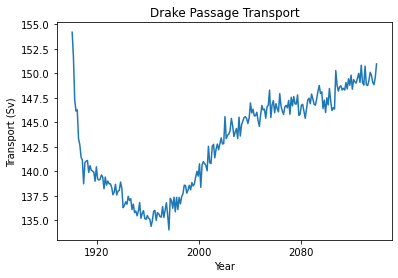

In [13]:
transport.plot(linestyle='-')
plt.title('Drake Passage Transport')
plt.xlabel('Year')
plt.ylabel('Transport (Sv)')